In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv
%matplotlib inline

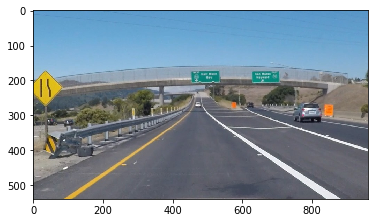

In [2]:
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)


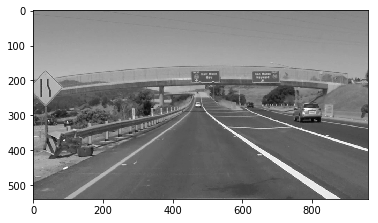

In [3]:
gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

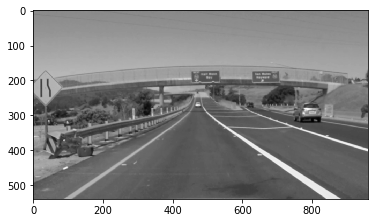

In [20]:
kernel_size = 5
blur_gray = cv.GaussianBlur(gray,(kernel_size,kernel_size),0)
plt.imshow(blur_gray,cmap='gray')

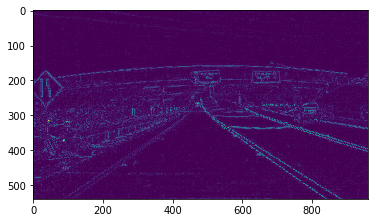

In [14]:
plt.imshow(cv.absdiff(gray,blur_gray))

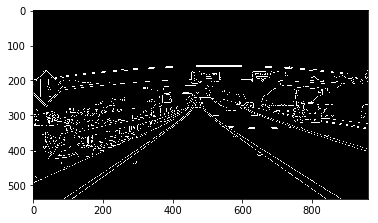

In [54]:
low_threshold =50
high_threshold =150
edges = cv.Canny(blur_gray,low_threshold,high_threshold)
plt.imshow(edges,cmap='Greys_r')


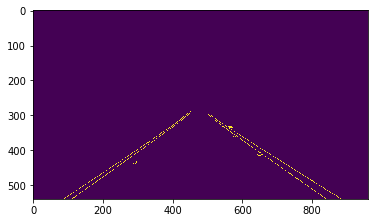

In [65]:



mask = np.zeros_like(edges)
ignore_mask_color = 255

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450,290),(490,290),(imshape[1],imshape[0])]],dtype=np.int32)
cv.fillPoly(mask,vertices,ignore_mask_color)
masked_edges=cv.bitwise_and(edges,mask)
plt.imshow(masked_edges)

In [81]:
rho = 2
theta = np.pi/180
threshold = 17
min_line_length =40
max_line_gap=20
line_image = np.copy(image)*0


In [82]:
lines = cv.HoughLinesP(masked_edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

In [83]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

        

In [84]:
color_edges = np.dstack((edges,edges,edges))

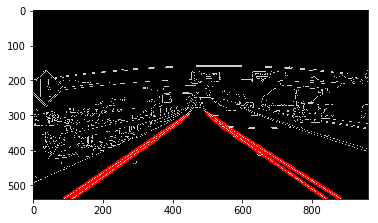

In [85]:
line_edges = cv.addWeighted(color_edges,0.8,line_image,1,0)
plt.imshow(line_edges)